In [2]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
%config InlineBackend.figure_formats = ['svg']

# MPL
import matplotlib
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.patches import Patch
plt.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.title_fontsize'] = 12
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['figure.dpi'] = 250
matplotlib.rcParams['figure.figsize'] = (5,5)

#colors
cmap = plt.get_cmap("viridis")
colors_b = sns.color_palette("colorblind")
colors_s = sns.color_palette("Set2")
viridis = cm.get_cmap('flare', 8)
colors = [viridis(i) for i in range(8)]
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

/var/folders/cm/wyr4f7dd46340qyn2n3sgyzm0000gn/T/ipykernel_99580/1583647370.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('flare', 8)


### Importing Data

In [3]:
file = 'Adam_160M_FW_SL2048_3Btok_BS256'
res = pd.read_pickle('../data/'+file+'.pkl')
res1 =res

file = 'Signum_160M_FW_SL2048_3Btok_BS256'
res = pd.read_pickle('../data/'+file+'.pkl')
res2 =res

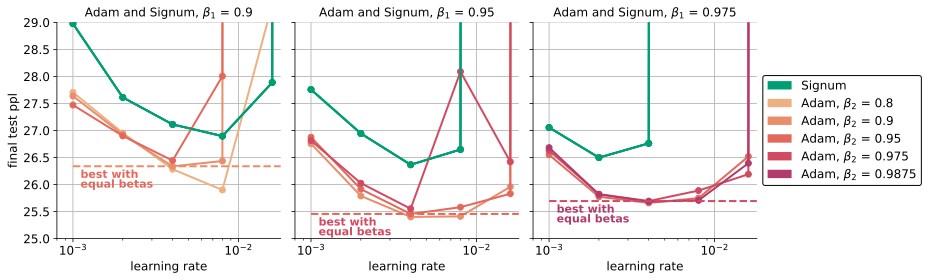

In [5]:

wds = [0.0]
beta1s_n = [0.9, 0.95, 0.975]
beta2s_n = [0.996875, 0.99375, 0.9875, 0.975, 0.95, 0.9, 0.8, 0.6]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharey=True)
res_betas = np.zeros((len(beta1s_n), len(beta2s_n) ))
d = []
for i, beta1 in enumerate(beta1s_n):
    ax = axes[i]
    if beta1==0.9:
        beta2s_n = [0.8, 0.9, 0.95]
        idx=0
    if beta1==0.95:
        beta2s_n = [0.9, 0.95, 0.975]
        idx=1
    if beta1==0.975:
        beta2s_n = [0.95, 0.975, 0.9875]
        idx=2
    for j, beta2 in enumerate(beta2s_n):
        lrs_plt = np.array(res1[ (res1['beta1'] == beta1) & (res1['beta2'] == beta2)]['lr'])
        data = np.array(res1[(res1['beta1'] == beta1) & (res1['beta2'] == beta2)]['ppl_test'])
        res_betas[i,j] = np.min(data)
        if beta1==beta2:
            res_best_beta12 = np.min(data)
            idx_best = j
        ax.plot(lrs_plt, data, color = colors[idx+j], marker='o', label=r'$\beta_2$ = '+str(beta2))
        ax.plot(lrs_plt, np.array(res2[(res2['beta1'] == beta1)]['ppl_test']), color=colors_b[2], marker='o')
        d.append(data)
    ax.text(lrs_plt[1]/1.8, res_best_beta12 - 0.06, r"best with", color=colors[idx+j], fontsize=11, verticalalignment='top', fontweight='bold')
    ax.text(lrs_plt[1]/1.8, res_best_beta12 - 0.24, r"equal betas", color=colors[idx+j], fontsize=11, verticalalignment='top', fontweight='bold')
     
    ax.plot(lrs_plt, 0*lrs_plt+res_best_beta12,'--',color = colors[idx+1])
    #ax.plot(lrs_plt, 0*lrs_plt+23.23,'-.',color = colors_b[2])
    #if beta1==0.975:
    #    ax.text(lrs_plt[1]/1.5, res_best_beta12 + 1.78, r"best", color=colors_b[2], fontsize=10, verticalalignment='top',fontweight='bold')
    #    ax.text(lrs_plt[1]/1.5, res_best_beta12 + 1.63, r"Signum", color=colors_b[2], fontsize=10, verticalalignment='top',fontweight='bold')
    #    ax.text(lrs_plt[1]/1.5, res_best_beta12 + 1.48, r"performance", color=colors_b[2], fontsize=10, verticalalignment='top',fontweight='bold')
             

    ax.set_xscale('log')
    ax.set_ylim([25, 29])
    ax.set_xlim([0.8e-3, 0.018])
    ax.grid()
    if beta1==beta1s_n[-1]:
        beta2s_n = [0.8, 0.9, 0.95, 0.975, 0.9875]
        legend_elements = [Patch(facecolor=colors_b[2], label='Signum')] + \
                          [Patch(facecolor=colors[ii], label=r'Adam, $\beta_2$ = '+str(beta2s_n[ii]))
                           for ii in range(len(beta2s_n))]
        #legend_elements = [Patch(facecolor=colors[ii], label=r'$\beta_2$ = '+str(beta2s_n[ii]))for ii in range(len(beta2s_n))]
        ax.legend(handles=legend_elements, framealpha=1, facecolor='white', edgecolor='black',loc='center left', bbox_to_anchor=(1, 0.5))
  
        
    #if beta1==beta1s_n[-1]:
    #    ax.legend(framealpha=1, facecolor='white', edgecolor='black',loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(r'Adam and Signum, $\beta_1$ = '+str(beta1))
    #ax.set_xticks(lrs)
    #ax.set_xticklabels([f"{num:.1e}" for num in lrs])
    ax.set_xlabel('learning rate')
    if i == 0:
        ax.set_ylabel('final test ppl')

plt.tight_layout()
#plt.savefig('sm3.pdf', format="pdf", bbox_inches="tight")

#plt.savefig('betas_160M_adam_signum_fineweb.pdf', format="pdf", bbox_inches="tight")
